In [430]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
from sklearn.metrics import mean_absolute_percentage_error

In [656]:
df = pd.read_excel(r'C:\Users\Lenovo\Desktop\Quation\Final project\SKU6_withexog.xlsx')

In [657]:
df.set_index('Date', inplace=True)

In [658]:
qty_values = df['Sales']
result = adfuller(qty_values)
# Extract and print the test results
print('Dickey-Fuller Test Results:')
print('Test Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Dickey-Fuller Test Results:
Test Statistic: -0.511966710937169
p-value: 0.8896600420342603
Critical Values:
	1%: -3.6889256286443146
	5%: -2.9719894897959187
	10%: -2.6252957653061224


<Figure size 1200x600 with 0 Axes>

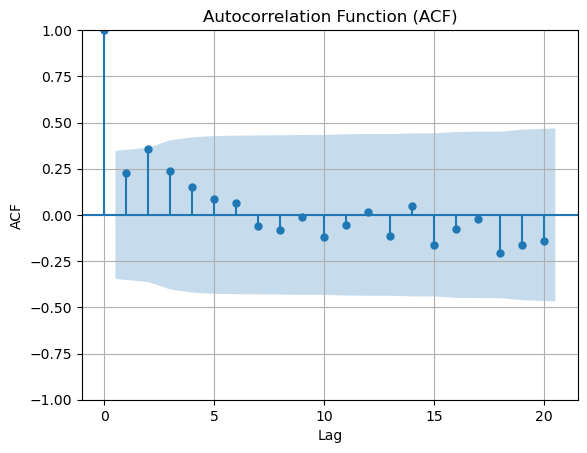

<Figure size 1200x600 with 0 Axes>

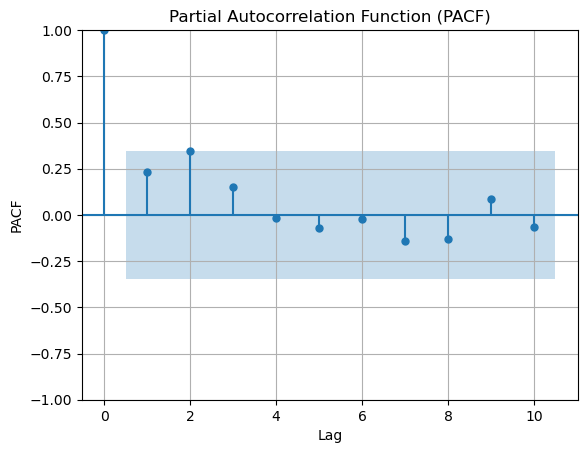

In [659]:
# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(df["Sales"],lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df["Sales"],lags=10)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid(True)
plt.show()

In [660]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
df_train = pd.DataFrame()
df_test = pd.DataFrame()
df_train['Sales'] = None
df_test['Sales'] = None
df_t=df['Sales']
df_train['Sales']=df.iloc[:28]['Sales']
df_test['Sales']=df.iloc[28:]['Sales']
exog_train = df.iloc[:28][['EXG INC','EXG DEC','EXG 3']]
exog_test=df.iloc[28:][['EXG INC','EXG DEC','EXG 3']]
exog_test

,EXG INC,EXG DEC,EXG 3
Date,,,
2023-08-01,1,0,1
2023-09-01,0,1,0
2023-10-01,0,1,1
2023-11-01,0,0,0


In [661]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Assuming df_train and exog_train are already defined
# For example:
# df_train = pd.DataFrame({'shift1': ...})
# exog_train = pd.DataFrame({'exog_var': ...})

# Function to find the best ARIMA model
def find_best_arima_model(y, exog, p_values, q_values, d=1):
    best_aic = np.inf
    best_order = None
    best_model = None

    for p in p_values:
        for q in q_values:
            try:
                model = ARIMA(y, exog=exog, order=(p, d, q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = (p, d, q)
                    best_model = results
                print(f'ARIMA({p},{d},{q}) - AIC:{results.aic}')
            except Exception as e:
                print(f'ARIMA({p},{d},{q}) - Failed with error: {e}')
                continue

    return best_order, best_model

# Define the range for p and q
p_values = range(0, 6)
q_values = range(0, 6)

# Find the best ARIMA model
best_order, best_model = find_best_arima_model(df_train['Sales'], exog_train, p_values, q_values)

# Print the best model summary
if best_model is not None:
    print(f'Best ARIMA order: {best_order}')
    print(best_model.summary())
else:
    print('No suitable ARIMA model found.')


ARIMA(0,1,0) - AIC:344.72925961038163
ARIMA(0,1,1) - AIC:342.89904621273536
ARIMA(0,1,2) - AIC:332.73229767442535
ARIMA(0,1,3) - AIC:334.59938607744067
ARIMA(0,1,4) - AIC:334.6943903095645
ARIMA(0,1,5) - AIC:334.1990521561856
ARIMA(1,1,0) - AIC:342.37686358257287
ARIMA(1,1,1) - AIC:343.98266627796465
ARIMA(1,1,2) - AIC:334.68689381259514
ARIMA(1,1,3) - AIC:335.79124097921795
ARIMA(1,1,4) - AIC:335.70582781321554
ARIMA(1,1,5) - AIC:338.86212814003886
ARIMA(2,1,0) - AIC:342.92025383414773
ARIMA(2,1,1) - AIC:339.8221217515296
ARIMA(2,1,2) - AIC:334.30439511680396
ARIMA(2,1,3) - AIC:332.23792479732384
ARIMA(2,1,4) - AIC:338.4930287406853
ARIMA(2,1,5) - AIC:337.79096875411193
ARIMA(3,1,0) - AIC:334.894733192695
ARIMA(3,1,1) - AIC:336.9020674816935
ARIMA(3,1,2) - AIC:329.572723396842
ARIMA(3,1,3) - AIC:331.9629902493258
ARIMA(3,1,4) - AIC:336.5858430068128
ARIMA(3,1,5) - AIC:344.9794859955986
ARIMA(4,1,0) - AIC:336.75519697975176
ARIMA(4,1,1) - AIC:338.4631400983837
ARIMA(4,1,2) - AIC:331.58

In [662]:
model = ARIMA(df_train["Sales"],exog=exog_train, order=(3, 1,2))
results = model.fit()
print(results.summary())
# Forecast future values for the test data
forecast = results.forecast(steps=len(df_test), exog=exog_test)
forecast = forecast.astype(int)
print(df_test)

df_forecast=forecast
#df_forecast.loc[59]=0
df_forecast

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   28
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -155.786
Date:                Mon, 17 Jun 2024   AIC                            329.573
Time:                        17:29:19   BIC                            341.235
Sample:                    04-01-2021   HQIC                           333.041
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
EXG INC      154.0733     35.890      4.293      0.000      83.730     224.416
EXG DEC     -133.1157     43.627     -3.051      0.002    -218.623     -47.609
EXG 3         16.2042     37.989      0.427      0.6

2023-08-01    322
2023-09-01     96
2023-10-01     76
2023-11-01    136
Freq: MS, Name: predicted_mean, dtype: int32

Mean Absolute Percentage Error (MAPE): 22.27%


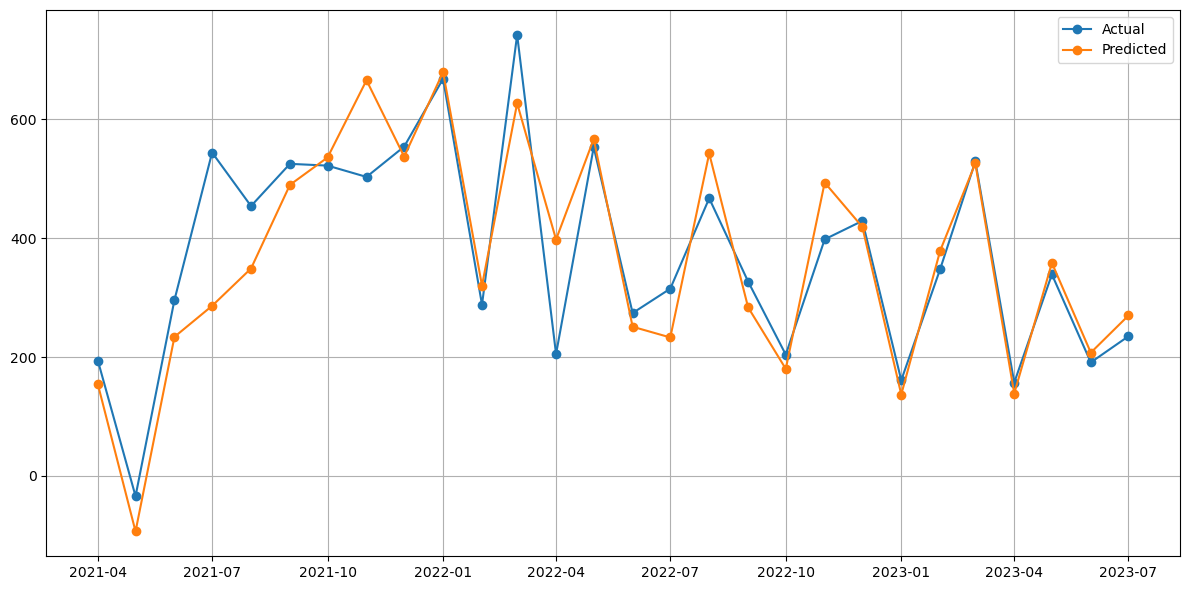

In [663]:
mape = mean_absolute_percentage_error(df_train['Sales'],results.fittedvalues ) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
plt.figure(figsize=(12,6))
plt.plot(df_train['Sales'],label='Actual',marker='o')
plt.plot(results.fittedvalues,label='Predicted',marker='o')
plt.legend()
plt.grid(True)  # Enable grid lines
plt.tight_layout()

Mean Absolute Percentage Error (MAPE): 17.35%


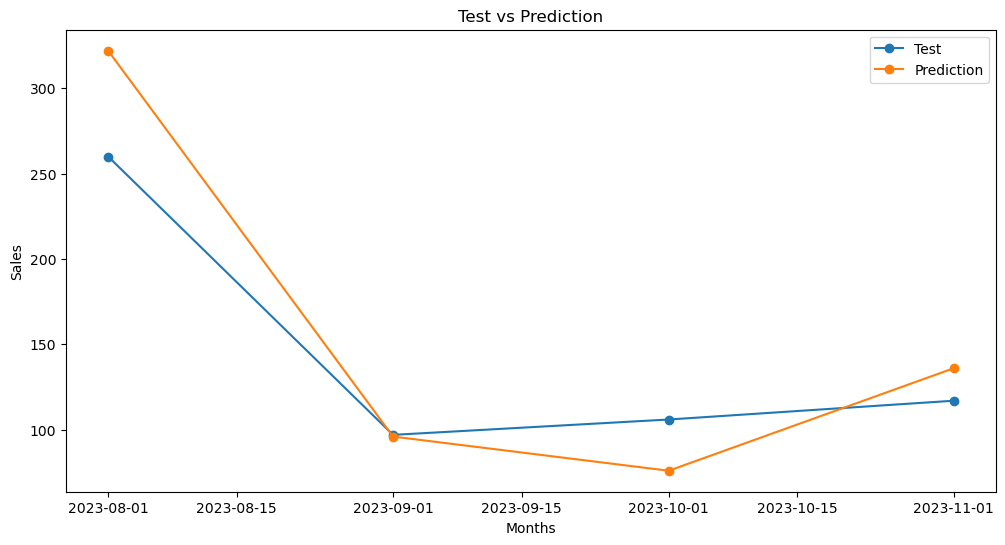

In [664]:
from sklearn.metrics import mean_absolute_percentage_error
# mape = np.mean(np.abs((forecast - df_test['QTY']) / df_test['QTY'])) * 100
# print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
mape = mean_absolute_percentage_error(df_test['Sales'], df_forecast) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
# Visualize the forecast
plt.figure(figsize=(12,6))
plt.plot(df_test['Sales'], label='Test',marker='o')
plt.plot(forecast, label='Prediction',marker='o')
plt.legend()
plt.title('Test vs Prediction')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()


In [689]:
df_predict = pd.read_excel(r'C:\Users\Lenovo\Desktop\Quation\Final project\SKU6_withexog.xlsx', sheet_name='Sheet1')

In [690]:
df_predict.set_index('Date', inplace=True)
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4 entries, 2023-12-01 to 2024-03-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   EXG INC  4 non-null      int64
 1   EXG DEC  4 non-null      int64
 2   EXG 3    4 non-null      int64
dtypes: int64(3)
memory usage: 128.0 bytes


In [691]:
# Extract the relevant exogenous variables
exog_f = df_predict[['EXG INC','EXG DEC','EXG 3']]

In [692]:
# Forecast future values using the results model and exogenous variables
pred = results.forecast(steps=len(df_predict), exog=exog_f)
# Convert predictions to integer
pred = list(pred.astype(int))
# Add the forecasted values to the 'Sales' column of df_predict
df_predict['Sales'] = pred

In [695]:
print(df_predict['Sales'])
df_final=pd.concat([df, df_predict], axis=0)

Date
2023-12-01    151
2024-01-01    229
2024-02-01    193
2024-03-01    306
Name: Sales, dtype: int64


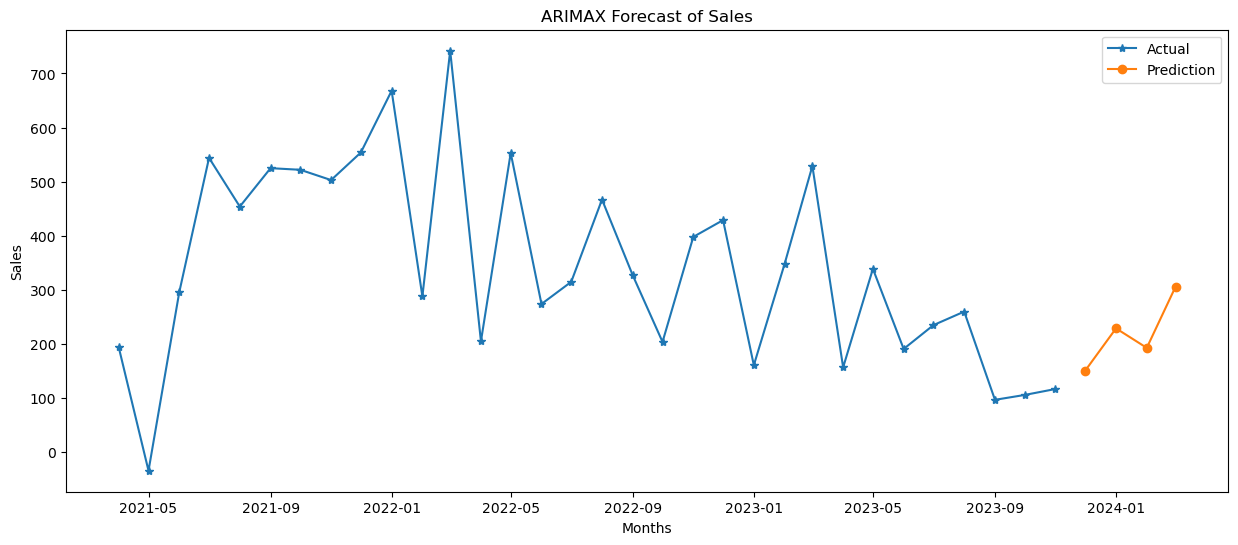

In [694]:
a=32
df_a=df_final.iloc[:a]
df_p=df_final.iloc[a:]
# Visualize the forecast
plt.figure(figsize=(15,6))
plt.plot( df_a['Sales'], label='Actual', marker='*')
plt.plot( df_p['Sales'], label='Prediction', marker='o')
# plt.plot(df_final.index, pred, label='Prediction')
plt.legend()
plt.title('ARIMAX Forecast of Sales')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()